In [2]:
import numpy as np
import pandas as pd

In [ ]:
from textblob import TextBlob

In [4]:
import seaborn as ss

In [5]:
import matplotlib

In [6]:
import sklearn

In [7]:
import matplotlib.pyplot as plt

In [8]:
data1=pd.read_csv("creditcard.csv")

In [9]:
data1.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
print(data1.shape)

(284807, 31)


In [11]:
data1=data1.sample(frac=0.1,random_state=1)

In [12]:
print(data1.shape)

(28481, 31)


In [13]:
fraud=data1.loc[data1["Class"]==1]
valid=data1[data1["Class"]==0]
print(format(len(fraud)))
print(format(len(valid)))


49
28432


In [14]:
ss.set()

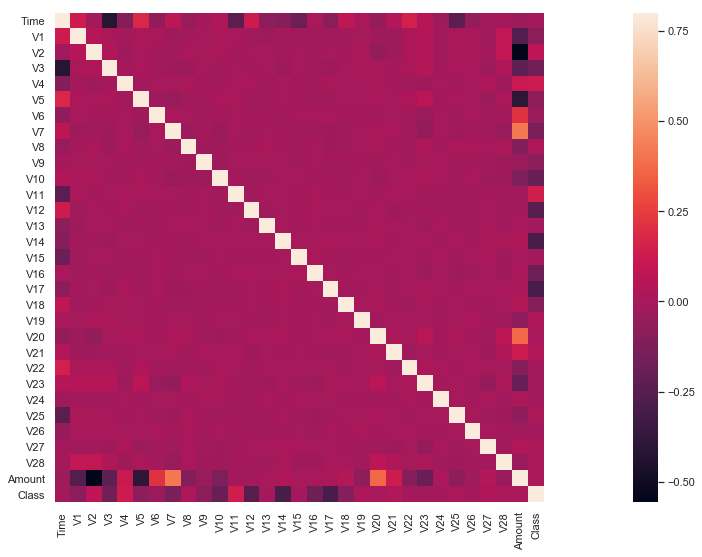

In [15]:
cormat=data1.corr()
fig=plt.figure(figsize = (32,9))
ax=ss.heatmap(cormat, vmax=.8, square=True)
plt.show()


In [16]:
columns= data1.columns.tolist()

In [17]:
columns= [c for c in columns if c not in ["Class"]]

In [18]:
target="Class"
X= data1[columns]
Y= data1[target]
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [ ]:
from sklearn.metrics import classification_report ,accuracy_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest as ifor

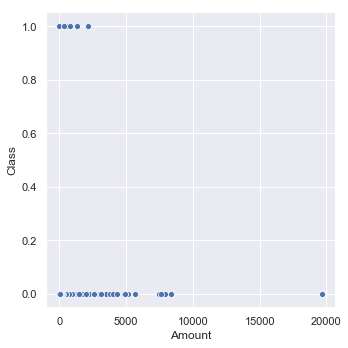

In [23]:
ss.relplot(x="Amount", y="Class",data=data1)

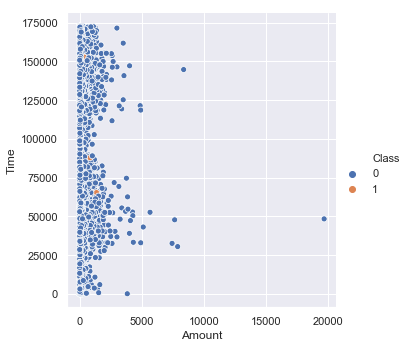

In [24]:
ss.relplot(x="Amount", y="Time",hue="Class",data=data1)

In [25]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [26]:
X= data1.iloc[:,:-1]
Y=data1["Class"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.35)

In [28]:
clf=linear_model.LogisticRegression(C=1e5)

In [29]:
clf.fit(X_train,y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100000.0)

In [31]:
prediction=np.array(clf.predict(X_test))

In [32]:
y=np.array(y_test)

In [34]:
from sklearn.metrics import confusion_matrix as cm

In [35]:
cm(y_test,prediction)

array([[9945,    8],
       [   7,    9]], dtype=int64)

In [36]:
accuracy_score(y_test,prediction)

0.9984953355401746

In [38]:
classification_report(y,prediction)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      9953\n           1       0.53      0.56      0.55        16\n\n    accuracy                           1.00      9969\n   macro avg       0.76      0.78      0.77      9969\nweighted avg       1.00      1.00      1.00      9969\n'